In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import random

In [2]:
#fucntion that do binary expansion to the input data x and expand to n-bit bianry format
def binary_expansion(x, n):
    result = np.zeros(n)
    tmp = 0
    for i in range(n-1):
        x -= 1/(2**(i)) * tmp
        if x >= 1/(2**(i+1)):
            tmp = 1
        else:
            tmp = 0
        result[i+1]  = tmp
    return result

print(binary_expansion(0.16798, 10))

[0. 0. 0. 1. 0. 1. 0. 1. 1. 0.]


In [3]:
def generate_numbers(degree):
    # Generate 10 random numbers between 0 and 1
    nums = [random.uniform(0, 1) for _ in range(degree)]
    
    # Normalize the numbers such that their sum is 1
    norm_factor = sum(nums)
    nums = [num / norm_factor for num in nums]
    
    # Randomly assign positive or negative signs
    signed_nums = [num * random.choice([-1, 1]) for num in nums]
    numtake = [0]
    for num in signed_nums:
        numtake.append(round(num,2))
    return numtake

def random_polynomial_coefficients(degrees):
    coefficients = []
    for d in degrees:
        coeff = generate_numbers(d)
        coefficients.append(coeff)
    #return nums
    return coefficients

degrees = [2]
#polynomial_coefficients = random_polynomial_coefficients(degrees)
polynomial_coefficients = [[0,0,1]]
print(polynomial_coefficients)

[[0, 0, 1]]


In [4]:
#function to randomly generate 1000 data on x in [0,1]
def generate_data(coefficients, samples=1000, noise_scale=0.01):
    X = np.random.rand(samples)
    y = generate_polynomial(coefficients, X)
    return train_test_split(X, y, test_size=0.2, random_state=42)
def generate_polynomial(coefficients, x):
    return np.sum([c * x**i for i, c in enumerate(coefficients)], axis=0)

In [5]:
#create a one hidden layer net work with a relu activation
def create_deep_network(layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim=neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

In [21]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, epochs=500):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

#set the epsilon that we want to test on
epsilon = [0.01, 0.02, 0.03, 0.05, 0.08, 0.1]

deep_results = []

for eps in epsilon:
    
    for coefficients in polynomial_coefficients:
        
        p = len(coefficients) - 1 #layer
        n = int(np.ceil(np.log2(1/eps))) + 1 #n-bit defined by epsilon
        X_train, X_test, y_train, y_test = generate_data(coefficients)
        x_train = []
        for i in X_train:
            n_exp = binary_expansion(i, n)
            x_train.append(n_exp)
        x_train = np.array(x_train)
        x_test = []
        for i in X_test:
            n_exp = binary_expansion(i, n)
            x_test.append(n_exp)
        x_test = np.array(x_test)
        #train the model
        deep_model = create_deep_network(p, n)
        deep_mse = train_and_evaluate(deep_model, x_train, x_test, y_train, y_test, epochs=500)
        deep_results.append(deep_mse)



7/7 [==============================] - 0s 498us/step


In [22]:
        
print("Deep Mean Absolute Errors:", deep_results)


Deep Mean Absolute Errors: [0.002907078563553001, 0.005561293082421625, 0.005290937033315655, 0.010784771660518763, 0.015499847246391512, 0.019637225773014605]


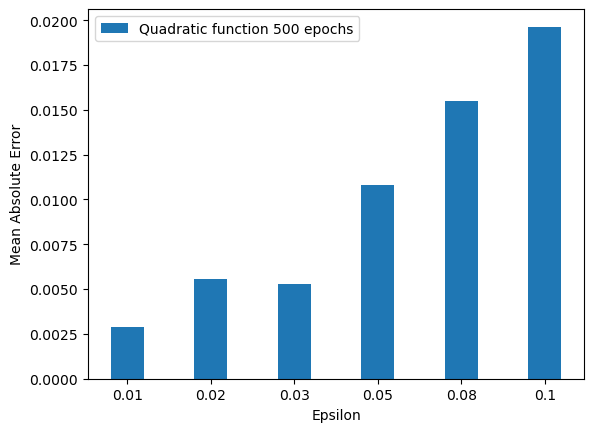

In [23]:

plt.bar(np.arange(len(epsilon)), deep_results, width=0.4, label='Quadratic function 500 epochs')
plt.xticks(np.arange(len(epsilon)), epsilon)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Epsilon")
plt.legend()
plt.show()

In [16]:

epsilon = [0.01, 0.02, 0.03, 0.05, 0.08, 0.1]
#shallow_results = []
deep_results = []
for eps in epsilon:
    
    for coefficients in polynomial_coefficients:
        p = len(coefficients) - 1
        n = int(np.ceil(np.log2(1/eps))) + 1
        X_train, X_test, y_train, y_test = generate_data(coefficients)
        x_train = []
        for i in X_train:
            n_exp = binary_expansion(i, n)
            x_train.append(n_exp)
        x_train = np.array(x_train)
        x_test = []
        for i in X_test:
            n_exp = binary_expansion(i, n)
            x_test.append(n_exp)
        x_test = np.array(x_test)
        
        deep_model = create_deep_network(p, n)
        deep_mse = train_and_evaluate(deep_model, x_train, x_test, y_train, y_test, epochs=200)
        deep_results.append(deep_mse)
print("Deep Mean Absolute Errors:", deep_results)        

7/7 [==============================] - 0s 498us/step
Deep Mean Absolute Errors: [0.010828202867433885, 0.012498933736891614, 0.022161086900319597, 0.011254300280521039, 0.01668419449430327, 0.023201570962050173]


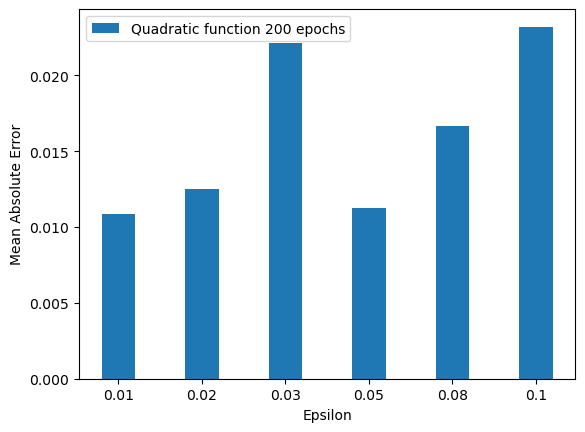

In [18]:
plt.bar(np.arange(len(epsilon)), deep_results, width=0.4, label='Quadratic function 200 epochs')
plt.xticks(np.arange(len(epsilon)), epsilon)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Epsilon")
plt.legend()
plt.show()

In [19]:
epsilon = [0.01, 0.02, 0.03, 0.05, 0.08, 0.1]
#shallow_results = []
deep_results = []
for eps in epsilon:
    
    for coefficients in polynomial_coefficients:
        p = len(coefficients) - 1
        n = int(np.ceil(np.log2(1/eps))) + 1
        X_train, X_test, y_train, y_test = generate_data(coefficients)
        x_train = []
        for i in X_train:
            n_exp = binary_expansion(i, n)
            x_train.append(n_exp)
        x_train = np.array(x_train)
        x_test = []
        for i in X_test:
            n_exp = binary_expansion(i, n)
            x_test.append(n_exp)
        x_test = np.array(x_test)
        
        deep_model = create_deep_network(p, n)
        deep_mse = train_and_evaluate(deep_model, x_train, x_test, y_train, y_test, epochs=100)
        deep_results.append(deep_mse)
print("Deep Mean Absolute Errors:", deep_results)  

7/7 [==============================] - 0s 831us/step
Deep Mean Absolute Errors: [0.029320677256385076, 0.027552891841926965, 0.21206095161433222, 0.021249856302192133, 0.037278617936122596, 0.051871824498828954]


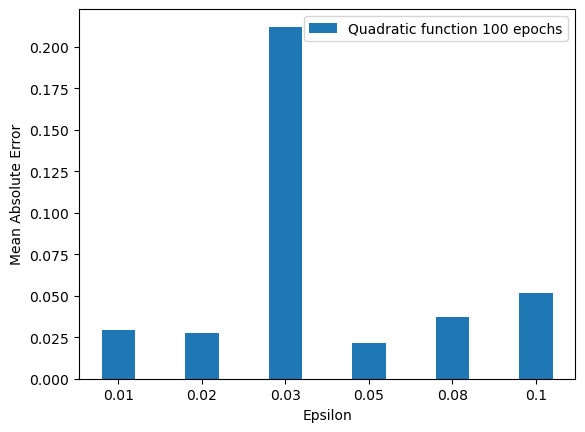

In [20]:
plt.bar(np.arange(len(epsilon)), deep_results, width=0.4, label='Quadratic function 100 epochs')
plt.xticks(np.arange(len(epsilon)), epsilon)
plt.ylabel("Mean Absolute Error")
plt.xlabel("Epsilon")
plt.legend()
plt.show()